In [1]:
pip install tensorflow==2.12.0

     -------------------------------------- 272.8/272.8 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.2 MB/s eta 0:00:00
     ------------------------------------- 440.7/440.7 kB 13.5 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 12.8 MB/s eta 0:00:00
     --------------------------------------- 51.9/51.9 MB 10.9 MB/s eta 0:00:00
     ------------------------------------- 194.6/194.6 kB 11.5 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.0
    Uninstalling numpy-2.0.0:
      Successfully uninstalled numpy-2.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\SWAPNIL\\anaconda3\\Lib\\site-packages\\~-mpy.libs\\libscipy_openblas64_-fb1711452d4d8cee9f276fd1449ee5c7.dll'
Consider using the `--user` option or check the permissions.



In [2]:
import matplotlib.pyplot as plt

C:\Users\SWAPNIL\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SWAPNIL\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\SWAPNIL\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\SWAPNIL\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers

In [4]:
Width=135
Height=85
BATCH_SIZE=64
CHANNELS=3
EPOCHS=30

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Oil Ageing",
    shuffle=True,
    image_size=(Width,Height),
    batch_size=BATCH_SIZE
)


Found 5858 files belonging to 4 classes.


In [5]:
class_names=dataset.class_names
class_names

['Fresh', 'Highly Aged', 'Lightly Aged', 'Moderately Aged']

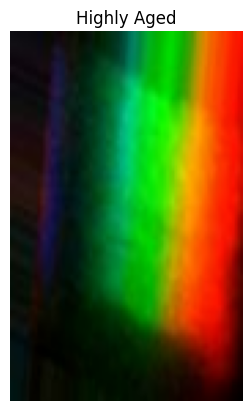

In [6]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[0]])
        plt.axis("off")

In [7]:
len(dataset)

92

In [8]:
train_size=0.7
len(dataset)*train_size

64.39999999999999

In [9]:
train_ds=dataset.take(64)
len(train_ds)

64

In [10]:
test_ds=dataset.skip(64)
len(test_ds)

28

In [11]:
val_size=0.15
len(dataset)*val_size

13.799999999999999

In [12]:
val_ds=test_ds.take(14)
len(val_ds)

14

In [13]:
test_ds=test_ds.skip(14)
len(test_ds)

14

In [14]:
def get_datset_partitions_tf(ds,train_split=0.7,val_split=0.15,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [15]:
train_ds,val_ds,test_ds=get_datset_partitions_tf(dataset)

In [16]:
len(train_ds)

64

In [17]:
len(val_ds)

13

In [18]:
len(test_ds)

15

In [19]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
TEST_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale=tf.keras.Sequential ([
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])

In [21]:
n_classes=4 
INPUT_SHAPE=(BATCH_SIZE,256,256,CHANNELS)
model=models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=INPUT_SHAPE),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

model.build(input_shape=INPUT_SHAPE)

C:\Users\SWAPNIL\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (64, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (64, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (64, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (64, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (64, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (64, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (64, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (64, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (64, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (64, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (64, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (64, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (64, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (64, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4599 - loss: 1.0998 - val_accuracy: 0.7464 - val_loss: 0.5293
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7814 - loss: 0.4919 - val_accuracy: 0.8990 - val_loss: 0.2931
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8928 - loss: 0.2851 - val_accuracy: 0.8762 - val_loss: 0.3704
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9315 - loss: 0.1955 - val_accuracy: 0.9447 - val_loss: 0.1284
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9484 - loss: 0.1245 - val_accuracy: 0.9387 - val_loss: 0.1255
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9338 - loss: 0.1796 - val_accuracy: 0.9688 - val_loss: 0.0837
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.9684 - loss: 0.0821 - val_accuracy: 0.9796 - val_loss: 0.0563
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9815 - loss: 0.0598 - val_accuracy: 0.9880 - val_lo

In [25]:
scores=model.evaluate(test_ds)

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step - accuracy: 1.0000 - loss: 0.0026


In [26]:
scores

[0.0024200978223234415, 1.0]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 64}

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

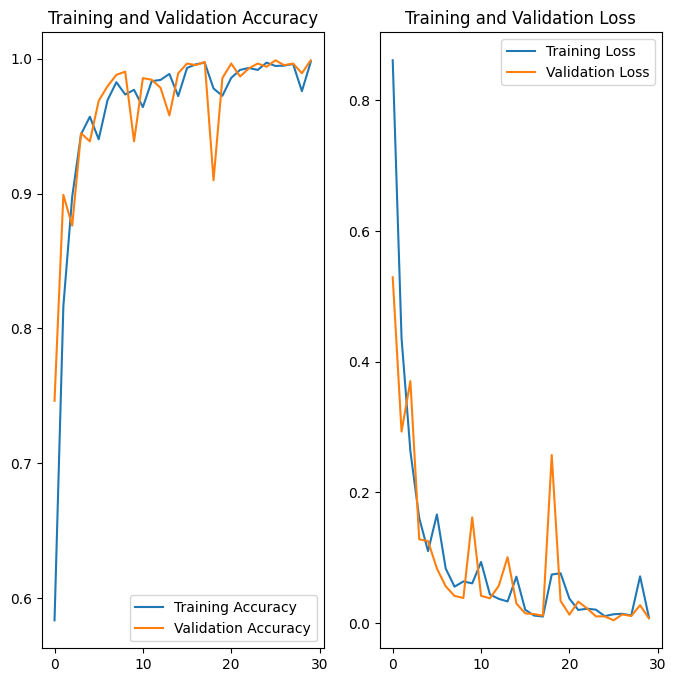

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
First image's actual label :  Moderately Aged
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
3


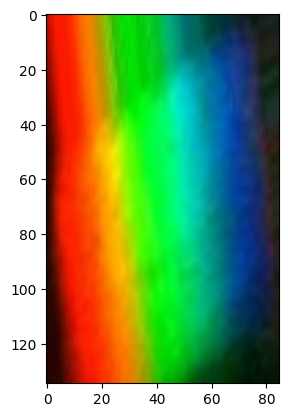

In [32]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image's actual label : ",class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print(np.argmax(batch_prediction[0]))

In [33]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


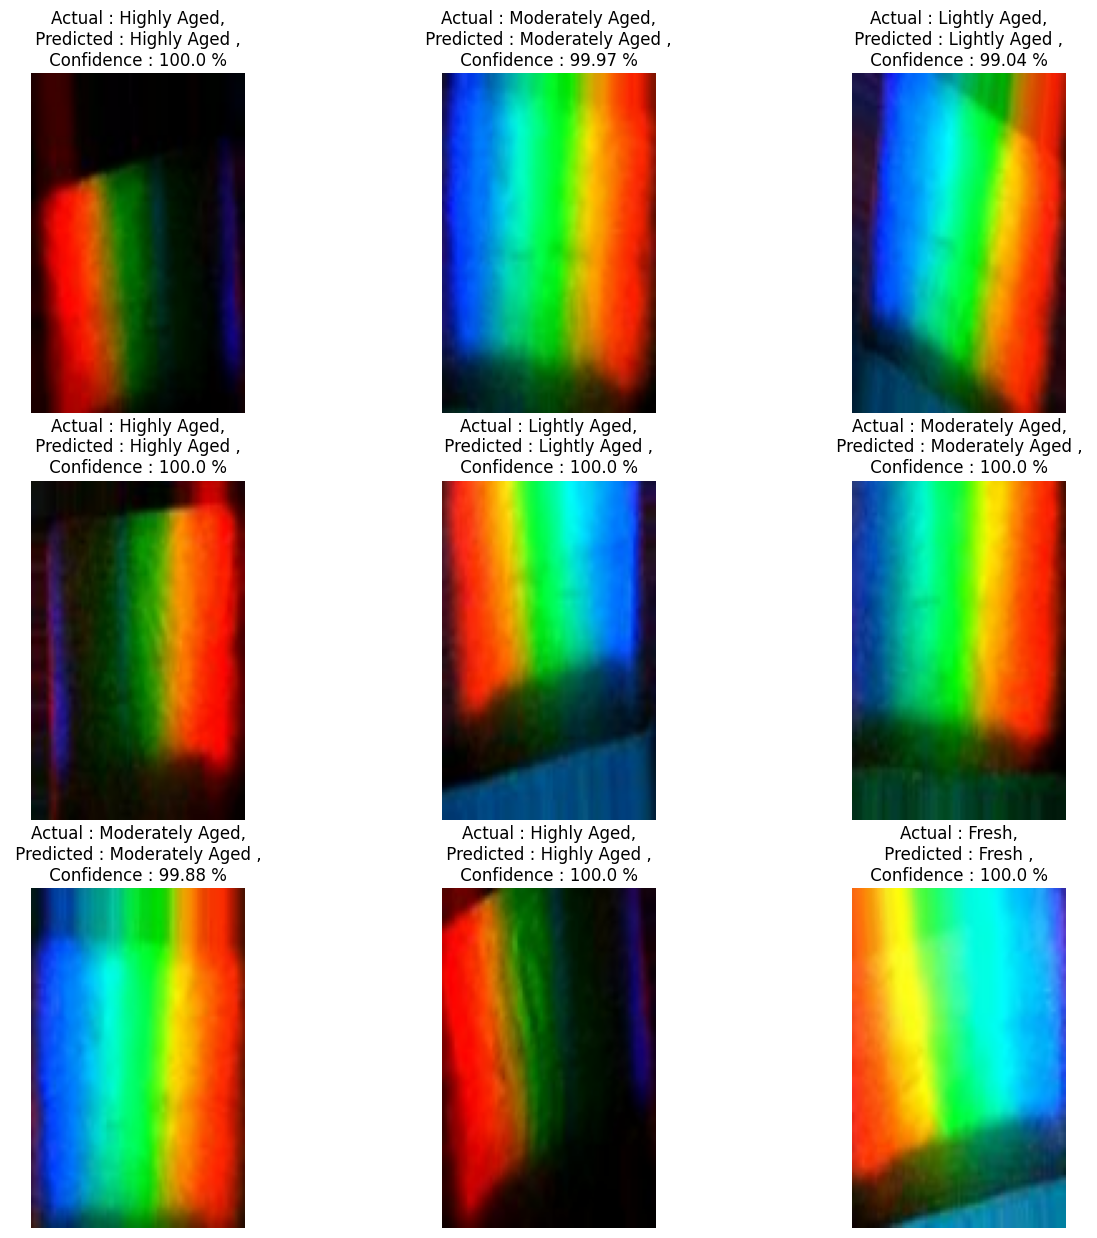

In [34]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class} , \n Confidence : {confidence} % ")
        plt.axis('off')

In [35]:
import h5py

In [37]:
import os
model.save(f"../Models/1.keras")